<a href="https://colab.research.google.com/github/ikhwanperwira/mnist-dims-reduction-clustering-autoencoder/blob/main/MNIST_DIMENSIONALITY_REDUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load MNIST
from keras.api.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import numpy as np

# Define Tensor Debugger
def dbg(tensor):
  # if tensor is ndarray, then print shape and dtype
  if isinstance(tensor, np.ndarray):
    print("Shape: ", tensor.shape)
    print("Dtype: ", tensor.dtype)
  # else, just print directly
  else:
    print(tensor)
  print()


In [3]:
# Debug all

dbg(train_images)
dbg(train_labels)
dbg(test_images)
dbg(test_labels)

Shape:  (60000, 28, 28)
Dtype:  uint8

Shape:  (60000,)
Dtype:  uint8

Shape:  (10000, 28, 28)
Dtype:  uint8

Shape:  (10000,)
Dtype:  uint8



In [4]:
np.max(train_images)

255

In [5]:
# Normalize range from -1 to 1 for input
train_images_input = (train_images - 0) / (255 - 0)
train_images_input = train_images_input * 2 - 1

test_images_input = (test_images - 0) / (255 - 0)
test_images_input = test_images_input * 2 - 1

# Normalize range from 0 to 1 for output
train_images_output = train_images / 255.0
test_images_output = test_images / 255.0

# round output
train_images_output = np.round(train_images_output)
test_images_output = np.round(test_images_output)

# display
display(np.min(train_images_input), np.max(train_images_input))
display(np.min(train_images_output), np.max(train_images_output))

# check uniqueness of output
np.unique(train_images_output)

-1.0

1.0

0.0

1.0

array([0., 1.])

In [6]:
# flatten all
train_images_input = train_images_input.reshape(-1, 784)
test_images_input = test_images_input.reshape(-1, 784)

train_images_output = train_images_output.reshape(-1, 784)
test_images_output = test_images_output.reshape(-1, 784)

dbg(train_images_input)
dbg(train_images_output)

dbg(test_images_input)
dbg(test_images_output)


Shape:  (60000, 784)
Dtype:  float64

Shape:  (60000, 784)
Dtype:  float64

Shape:  (10000, 784)
Dtype:  float64

Shape:  (10000, 784)
Dtype:  float64



In [7]:
# get unique tensor of train set of every classes
unique_train_images_input = []
class_labels = []
for i in range(10):
  if i not in class_labels:
    unique_train_images_input.append(train_images_input[train_labels == i][0])
    class_labels.append(i)

  if len(class_labels) == 10:
    break

unique_train_images_input = np.array(unique_train_images_input)
dbg(unique_train_images_input)

Shape:  (10, 784)
Dtype:  float64



In [8]:
# get unique tensor of train set of every classes
unique_train_images_output = []
class_labels = []
for i in range(10):
  if i not in class_labels:
    unique_train_images_output.append(train_images_input[train_labels == i][0])
    class_labels.append(i)

  if len(class_labels) == 10:
    break

unique_train_images_output = np.array(unique_train_images_output)
dbg(unique_train_images_output)

Shape:  (10, 784)
Dtype:  float64



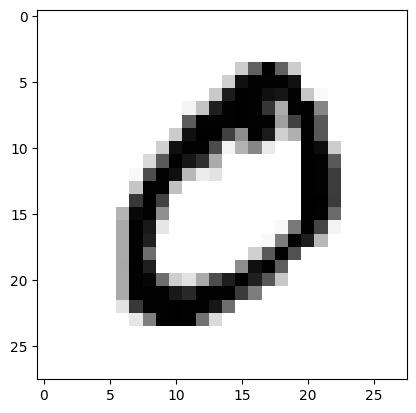

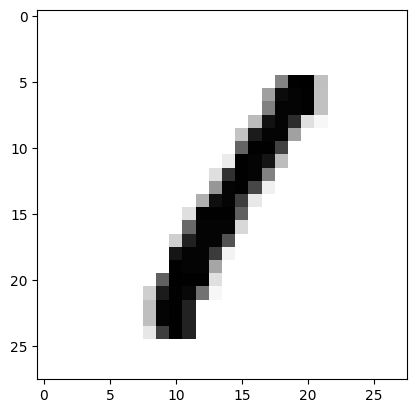

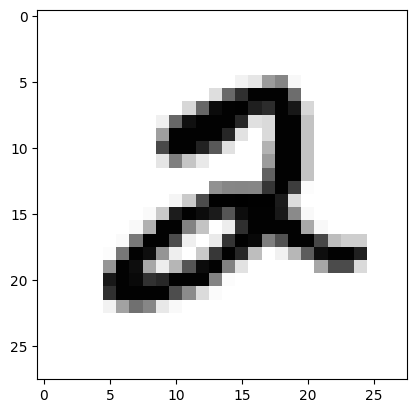

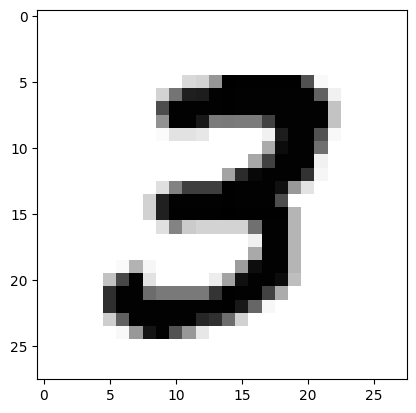

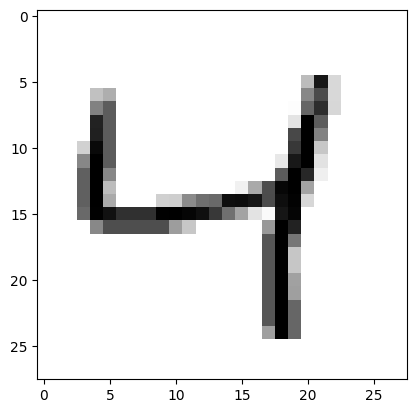

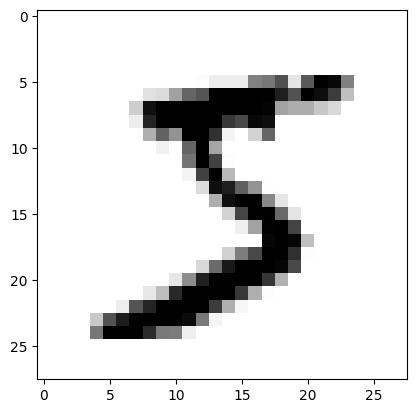

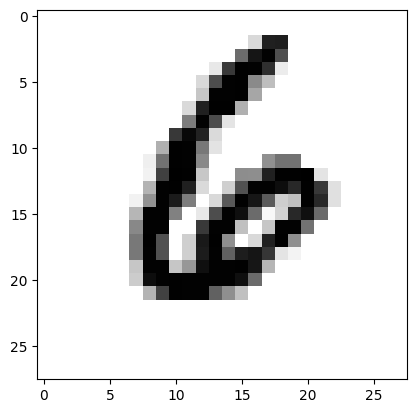

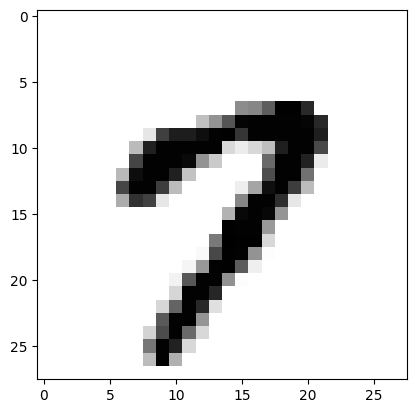

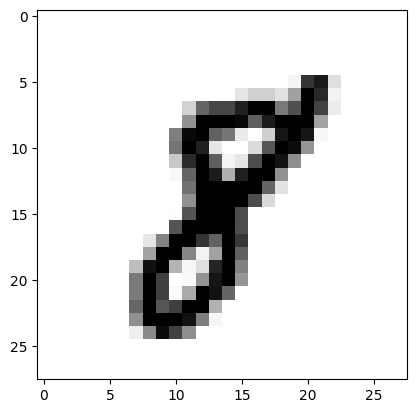

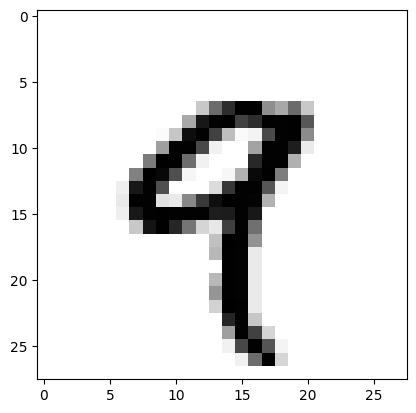

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.imshow(unique_train_images_input[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.show()

In [9]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

# Define autoencoder with just using MLP

# Input Layer
input_layer = layers.Input(shape=(784,))

def EncoderDense(units):
  return layers.Dense(units, activation='tanh')

def DecoderDense(units):
  return layers.Dense(units, activation='tanh')

# Encoder
encoder_layer = EncoderDense(512)(input_layer)
# encoder_layer = EncoderDense(256)(encoder_layer)
encoder_layer = EncoderDense(128)(encoder_layer)
# encoder_layer = EncoderDense(64)(encoder_layer)
encoder_layer = EncoderDense(32)(encoder_layer)
# encoder_layer = EncoderDense(16)(encoder_layer)
encoder_layer = EncoderDense(8)(encoder_layer)
# encoder_layer = EncoderDense(4)(encoder_layer)

# add batchnorm
encoder_layer = layers.BatchNormalization()(encoder_layer)

# Bottleneck
bottleneck_layer= layers.Dense(2, activation='tanh')(encoder_layer)

# add batchnor
decoder_layer = layers.BatchNormalization()(bottleneck_layer)

# Decoder
# decoder_layer = DecoderDense(4)(bottleneck_layer)
decoder_layer = DecoderDense(8)(decoder_layer)
# decoder_layer = DecoderDense(16)(decoder_layer)
decoder_layer = DecoderDense(32)(decoder_layer)
# decoder_layer = DecoderDense(64)(decoder_layer)
decoder_layer = DecoderDense(128)(decoder_layer)
# decoder_layer = DecoderDense(256)(decoder_layer)
decoder_layer = DecoderDense(512)(decoder_layer)

# Output Layer
output_layer = layers.Dense(784, activation='tanh')(decoder_layer)

# Define model
autoencoder = models.Model(input_layer, output_layer)

# optimizer with learning rate 1e-5
optimizer = optimizers.Adam(learning_rate=1e-5)

# Compile model
autoencoder.compile(optimizer=optimizer, loss='mse')

# Print model summary
autoencoder.summary()

# Get encoder part only for encoding
encoder = models.Model(input_layer, bottleneck_layer)
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │         402,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944,810 (3.60 MB)

 Trainable params: 944,790 (3.60 MB)

 Non-trainable params: 20 (80.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 472,026 (1.80 MB)

 Trainable params: 472,010 (1.80 MB)

 Non-trainable params: 16 (64.00 B)

In [10]:
!gdown 1-He05myLWlgFEvDn6cn9Yc3-ssm-6pAY

Downloading...
From: https://drive.google.com/uc?id=1-He05myLWlgFEvDn6cn9Yc3-ssm-6pAY
To: /content/autoencoder_weights_part3.weights.h5
100% 11.4M/11.4M [00:00<00:00, 21.8MB/s]


In [11]:
# first 100 data for cluster visualization

NUM_TO_VISUALIZE = len(train_images)

viz_images_cluster = train_images_input[:NUM_TO_VISUALIZE]
viz_labels_cluster = train_labels[:NUM_TO_VISUALIZE]

In [12]:
# Hyperparam for training autoencoder

EPOCHS = 100

In [61]:
# callback for infer every epoch for the encoder part
from keras.api.callbacks import Callback

# encoder_output buffer based on num of EPOCHS and num of first 100 test data with numpy
encoder_output_buff = np.zeros((EPOCHS, NUM_TO_VISUALIZE, 2))

inputter = unique_train_images_input

# decoder_output buffer
decoder_output_buff = np.zeros((EPOCHS, len(inputter), 28, 28))

class EncoderCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
      global encoder, encoder_output_buff, vis_images_cluster

      # set weight of encoder model
      encoder.set_weights(self.model.get_weights()[:len(encoder.get_weights())])

      encoder_output = encoder.predict(viz_images_cluster, verbose=0)
      encoder_output_buff[epoch] = encoder_output

class DecoderCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
      global decoder_output_buff, inputter
      decoder_output = self.model.predict(inputter, verbose=0).reshape(-1, 28, 28)
      decoder_output_buff[epoch] = decoder_output

In [62]:
encoder_output_collection =  EncoderCallback()
decoder_output_collection = DecoderCallback()

histories = []

In [15]:
# load weights
# autoencoder.load_weights('/content/autoencoder_weights_part3.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [63]:
# Train

history = autoencoder.fit(train_images_input, np.round(train_images_input),
                epochs=EPOCHS,
                batch_size=256,
                shuffle=True,
                # validation_data=(test_images_input, np.round(test_images_input)),
                callbacks=[encoder_output_collection, decoder_output_collection],
                initial_epoch=0)

histories.append(history)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1879
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.1882
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1878
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1875
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.1879
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1873
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1879
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.1870
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1869
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1871
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.1872
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1871
Epoch 13/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1873
Epoch 14/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.1871
Epoch 15/100
235/235 ━━━━━━

KeyboardInterrupt: 

In [28]:
# save weights
autoencoder.save_weights('./drive/MyDrive/autoencoder_weights_part6.weights.h5')

In [20]:
# colormap of labels from 0 to 9

import matplotlib.cm as cm
import matplotlib.pyplot as plt

cmap = cm.get_cmap('tab10')
colors = [cmap(i) for i in range(10)]

<ipython-input-20-a16cc5c100d2>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


<ipython-input-43-591d4147e471>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=colors[i], label=i, s=10)


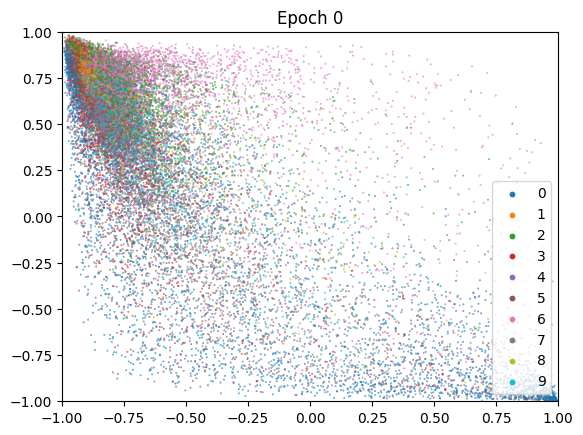

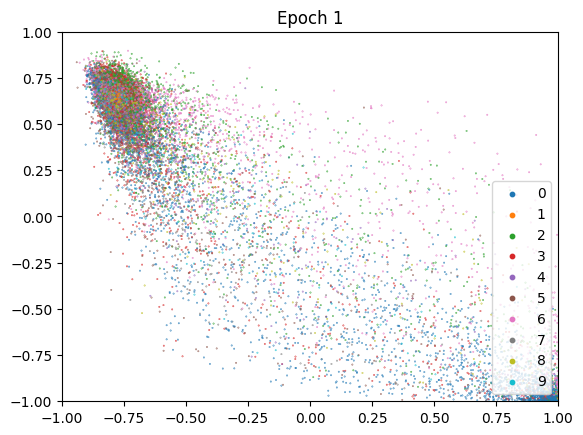

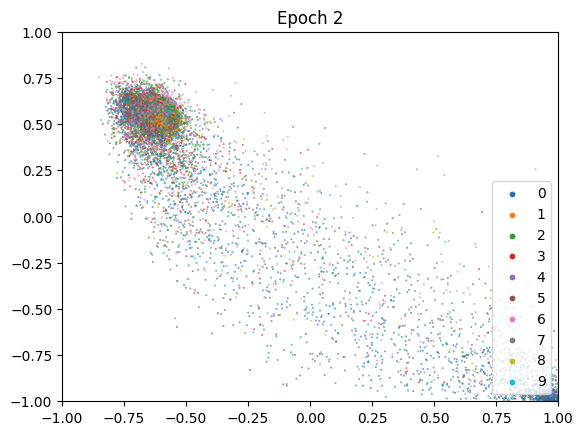

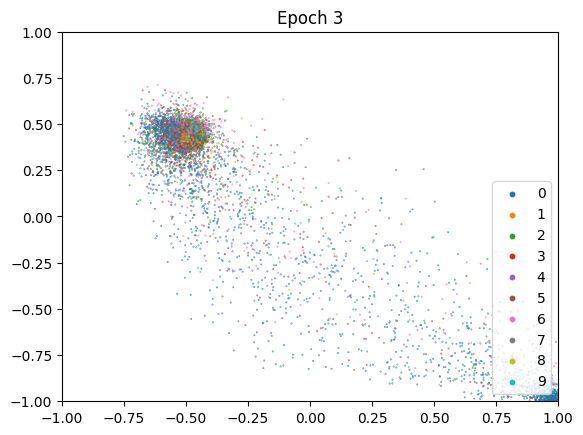

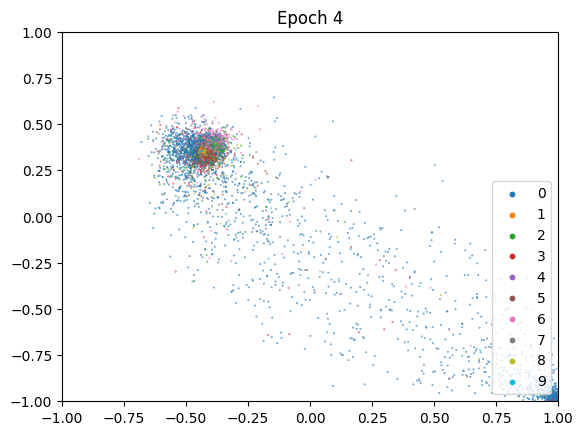

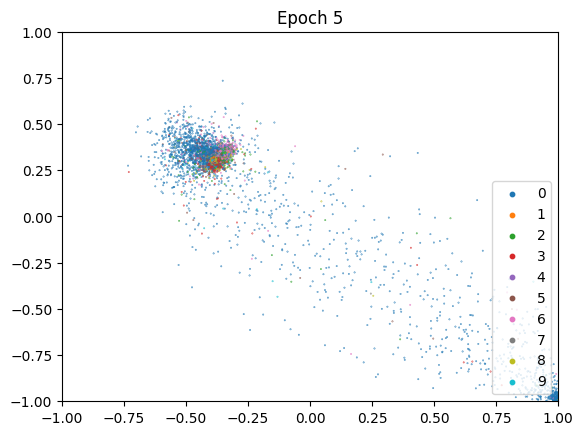

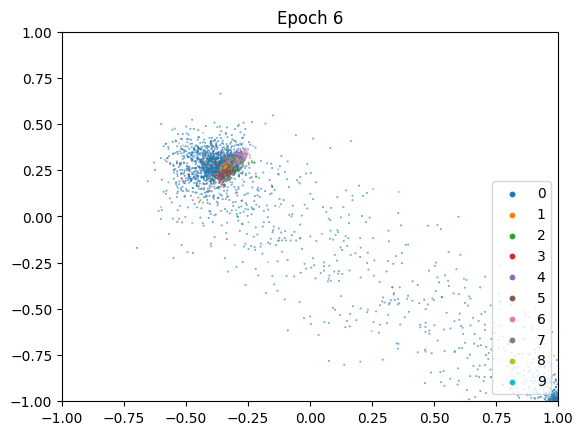

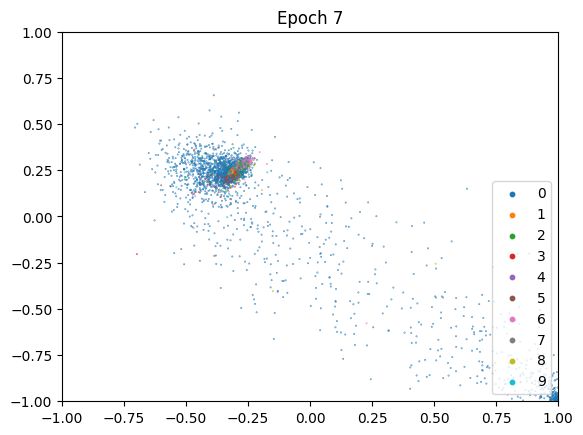

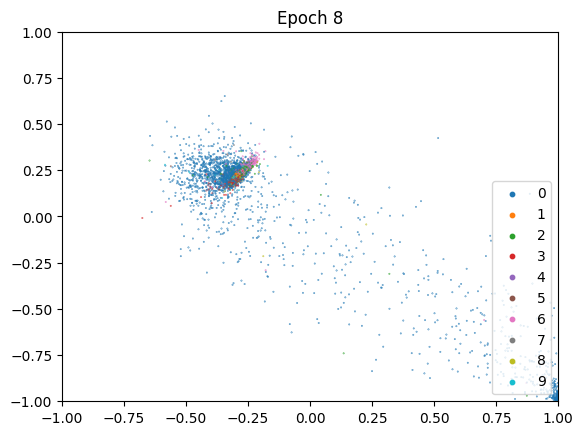

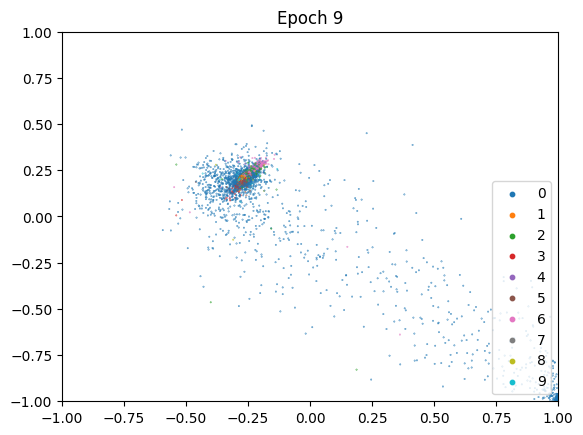

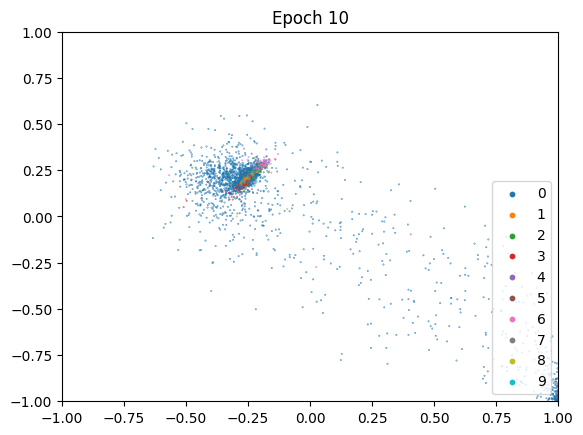

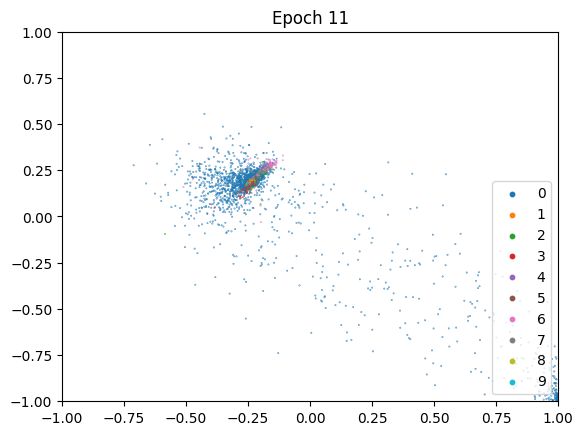

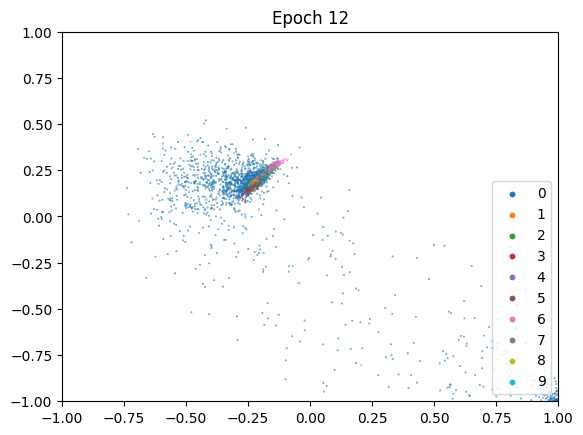

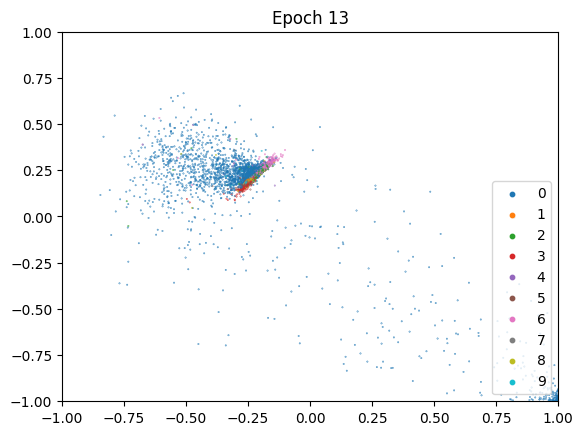

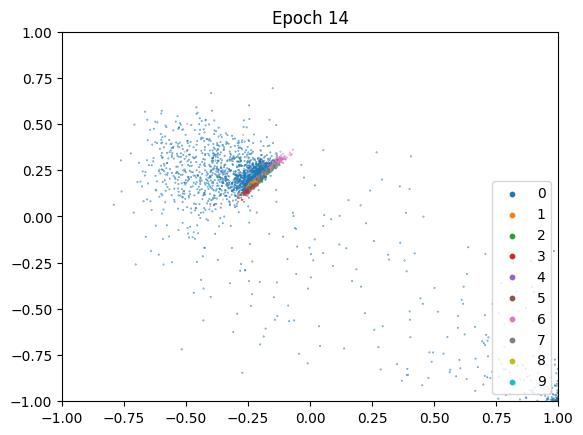

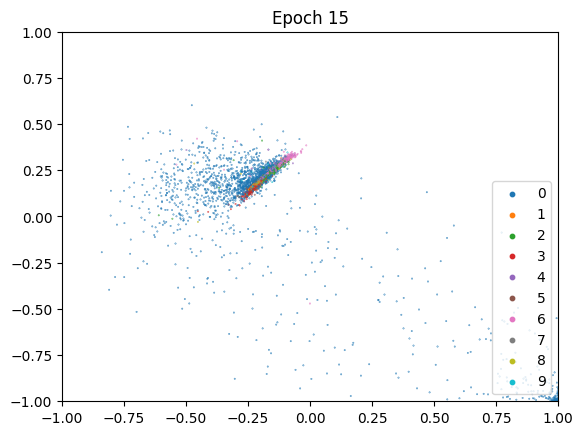

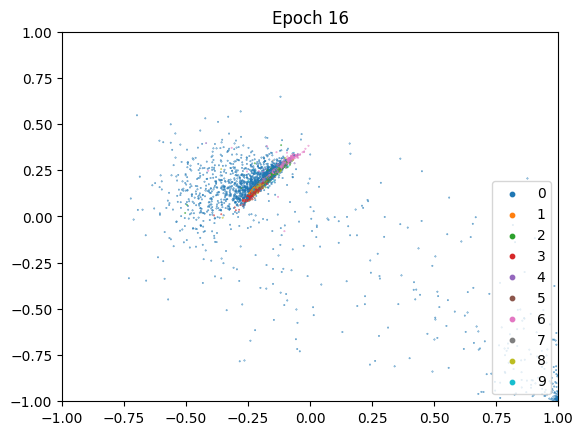

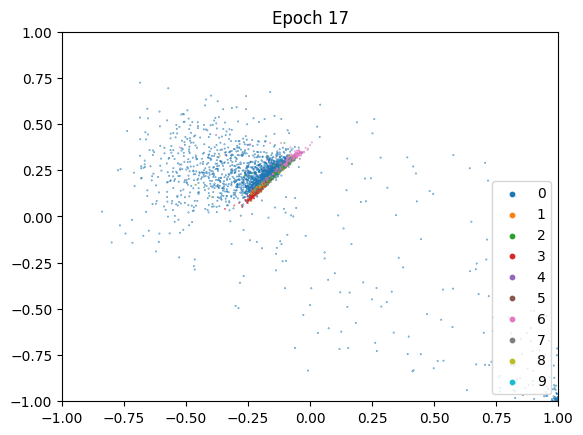

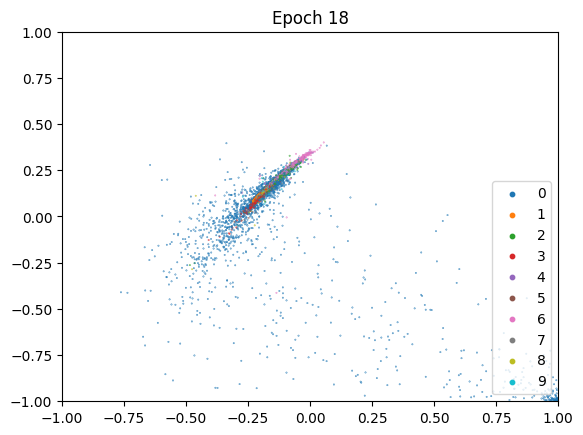

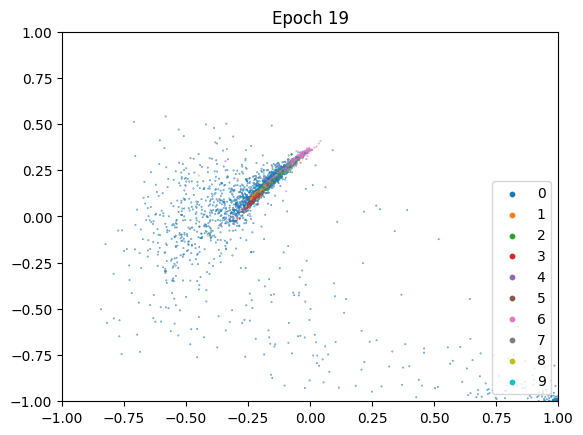

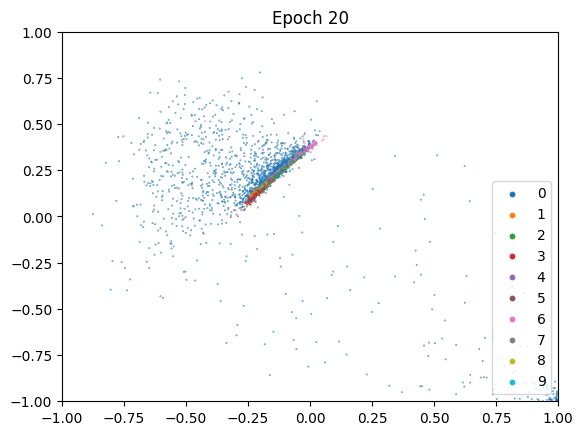

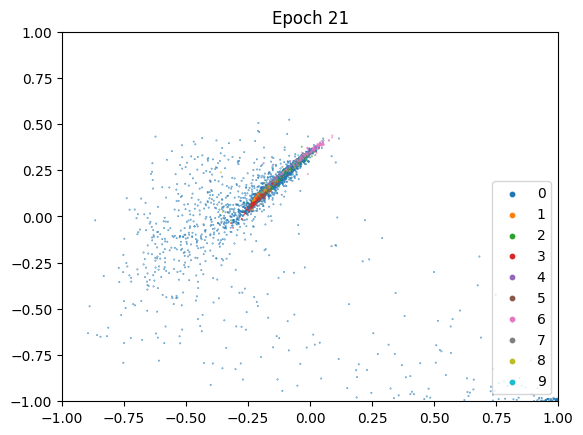

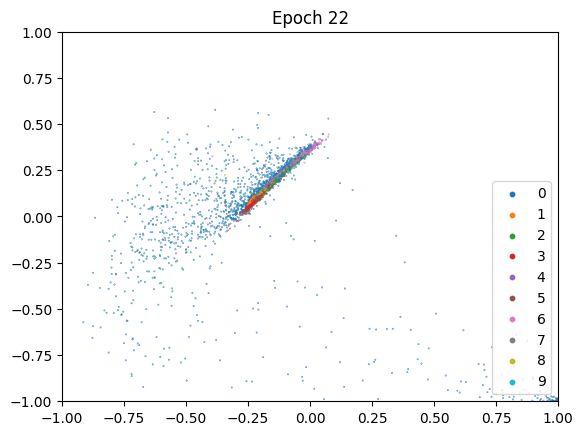

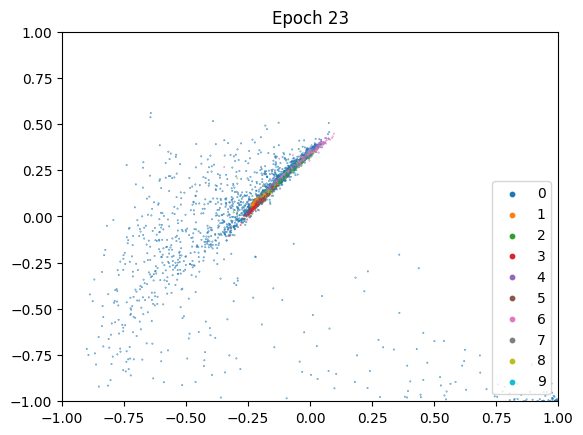

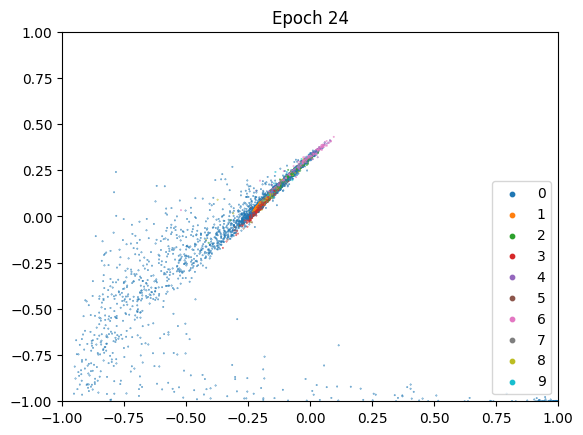

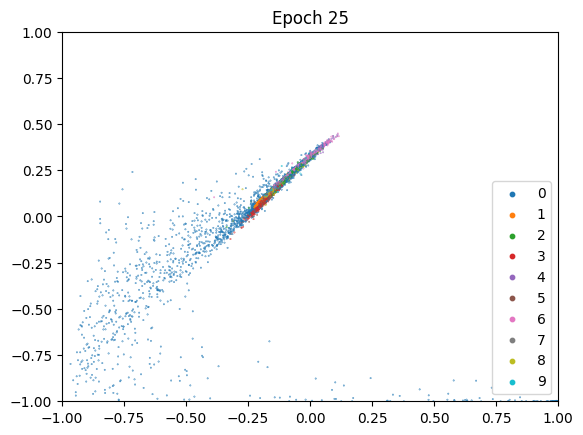

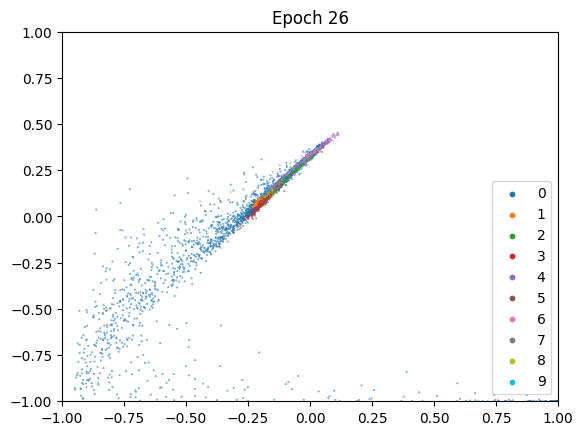

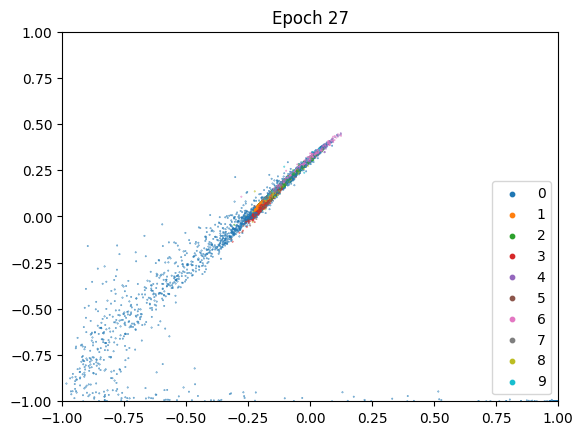

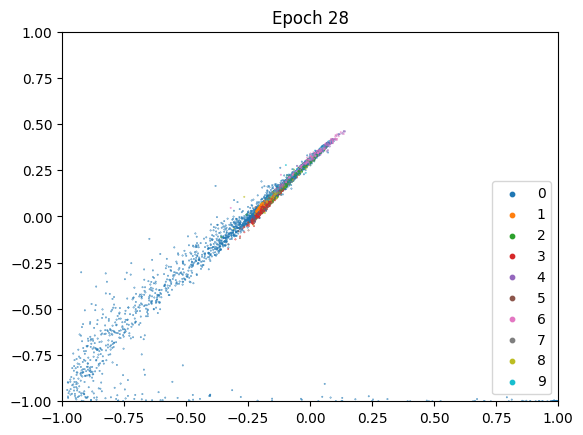

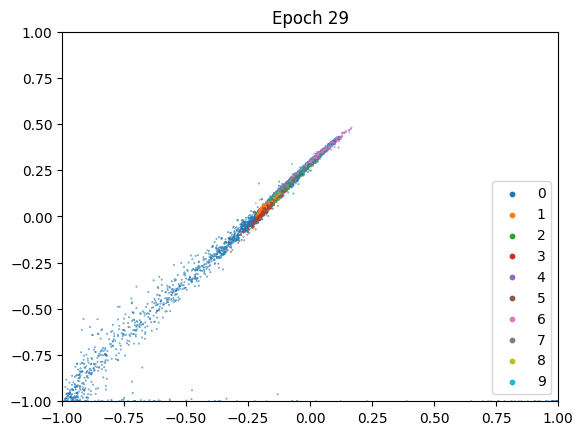

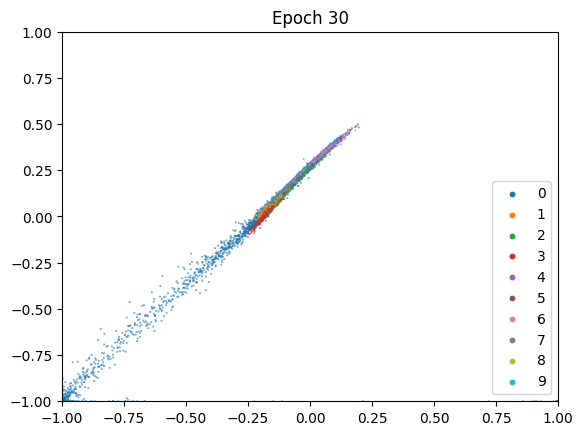

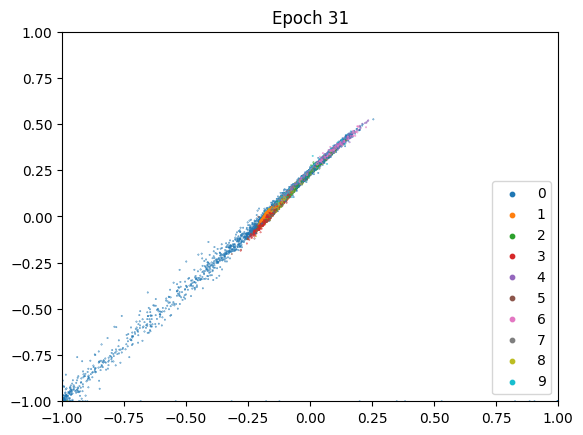

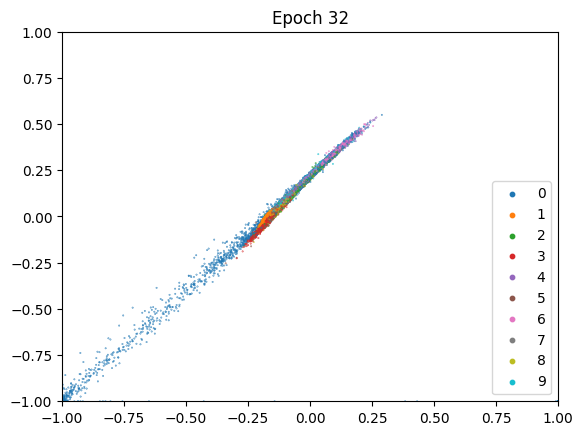

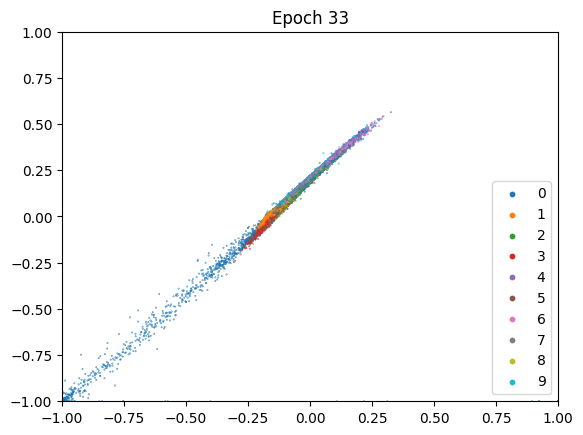

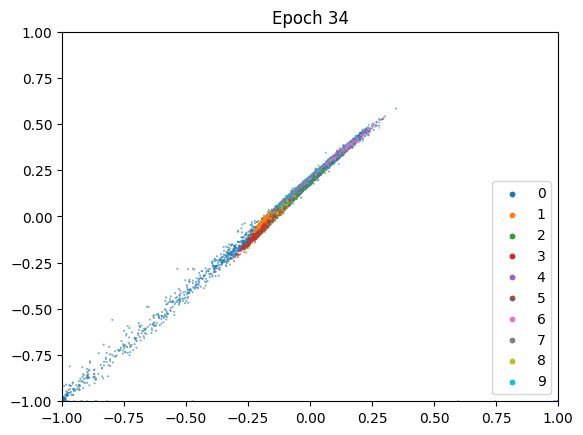

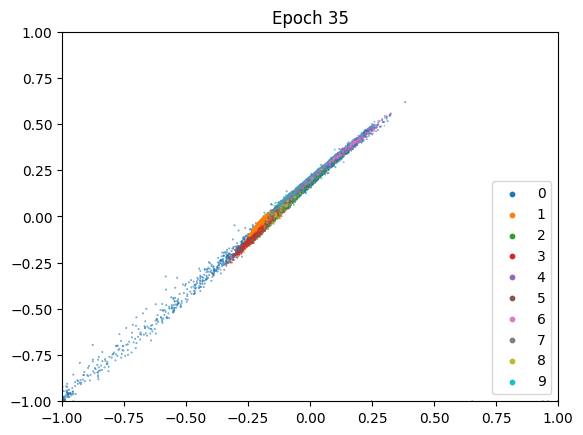

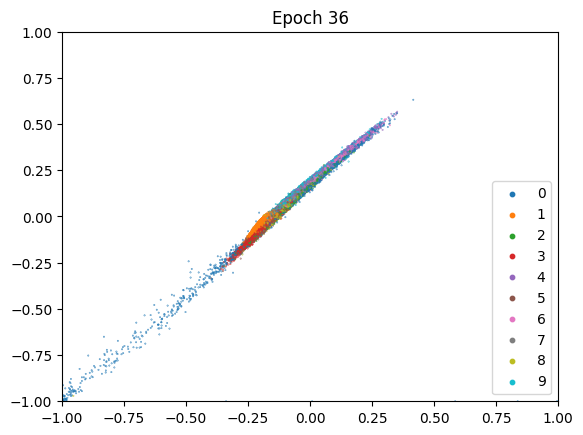

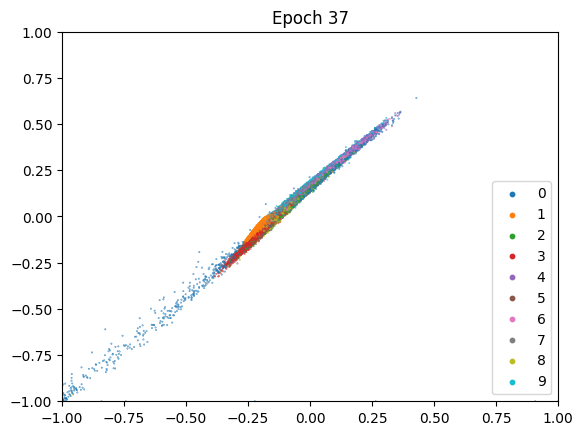

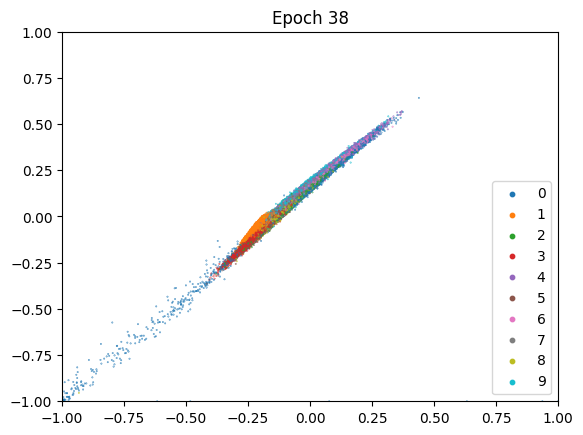

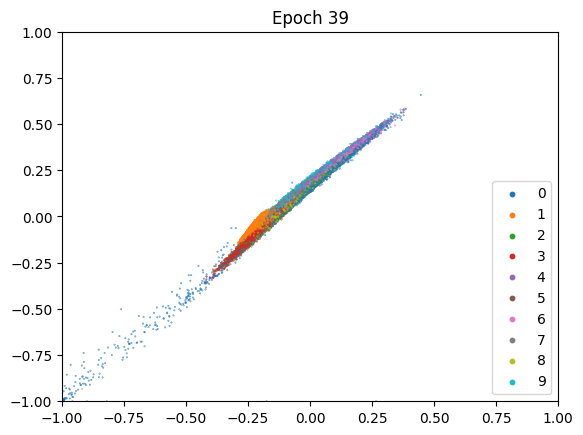

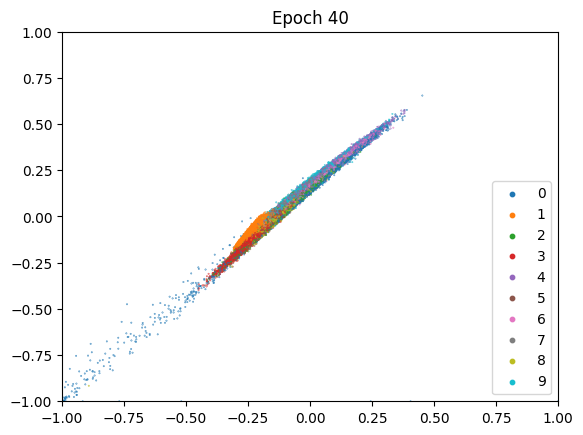

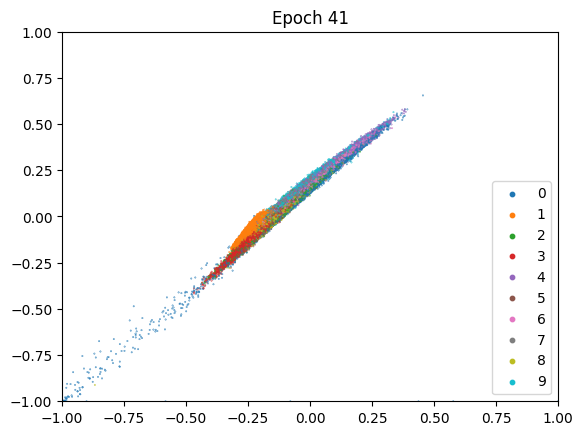

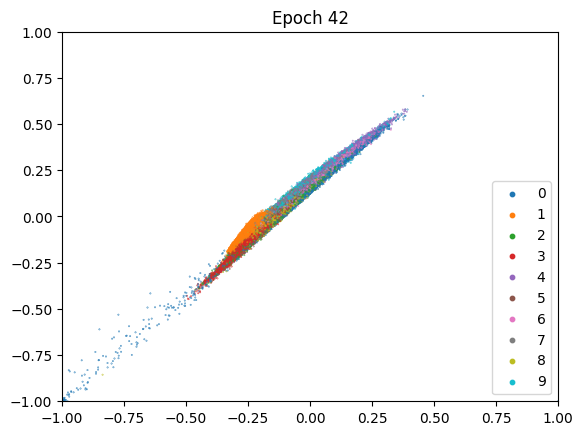

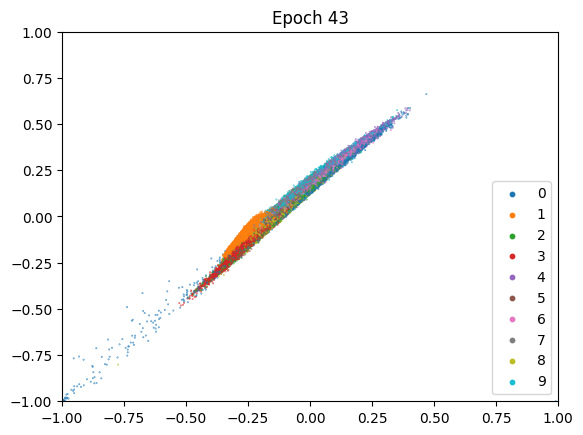

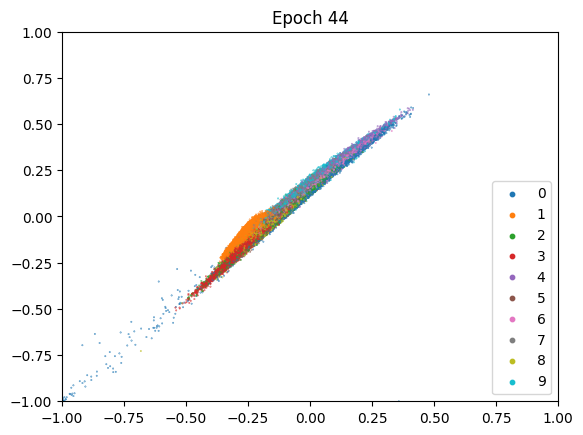

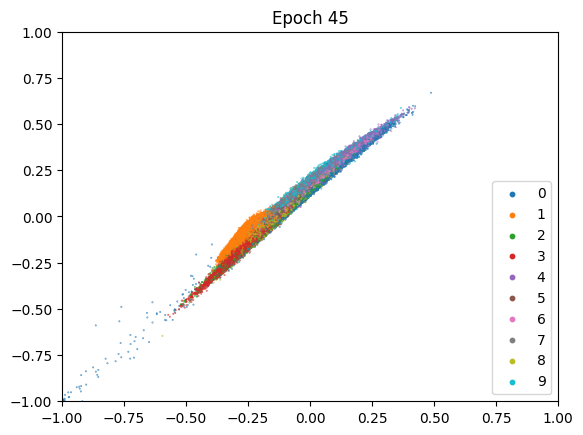

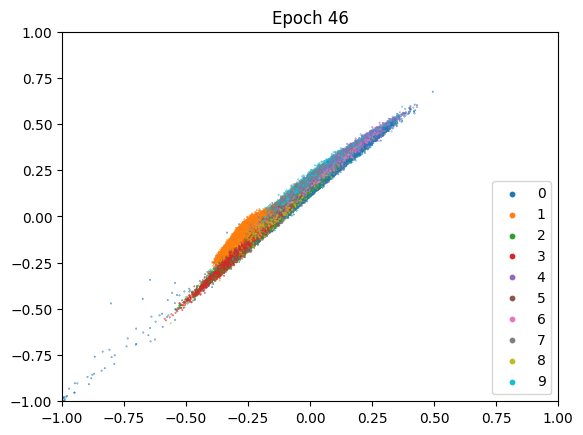

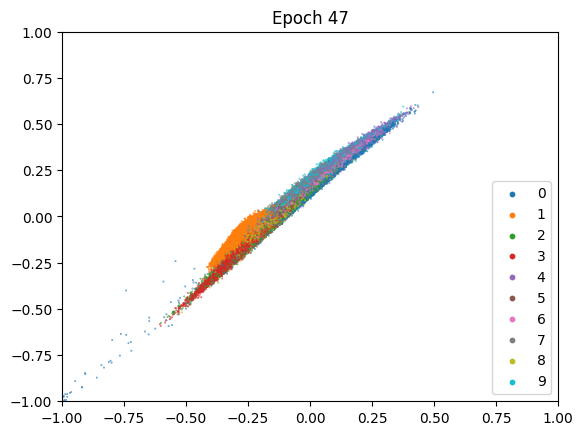

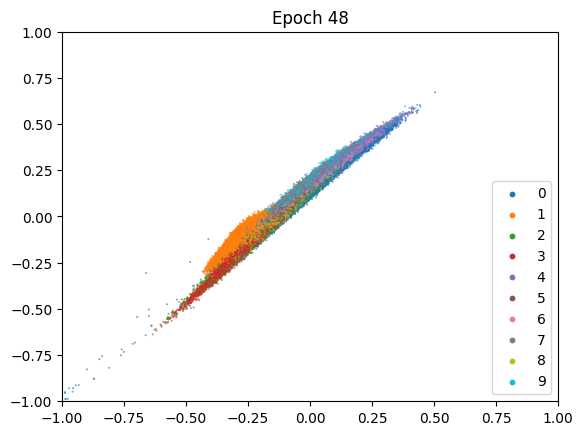

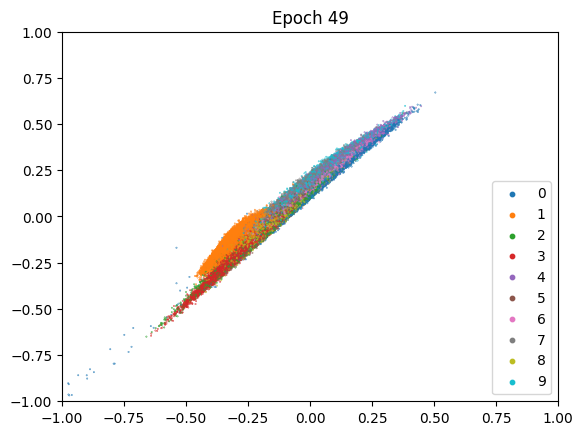

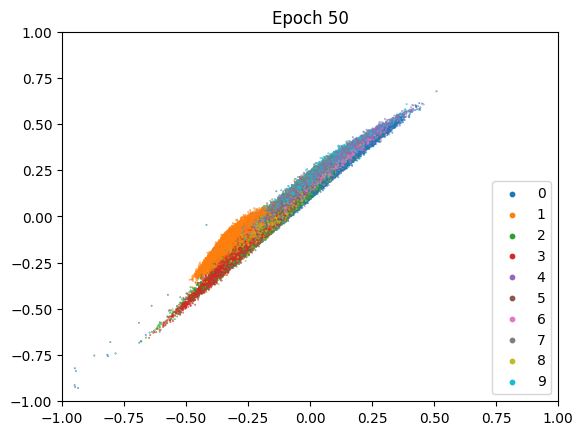

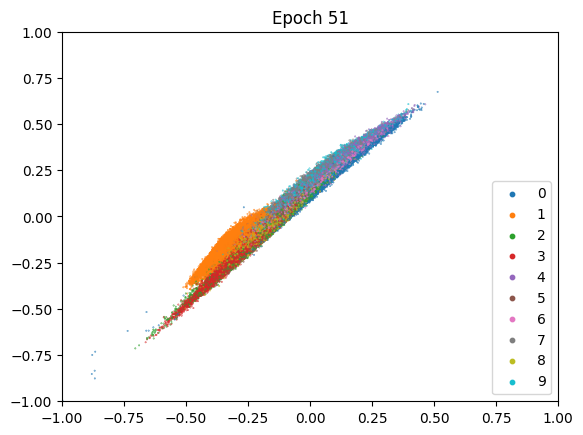

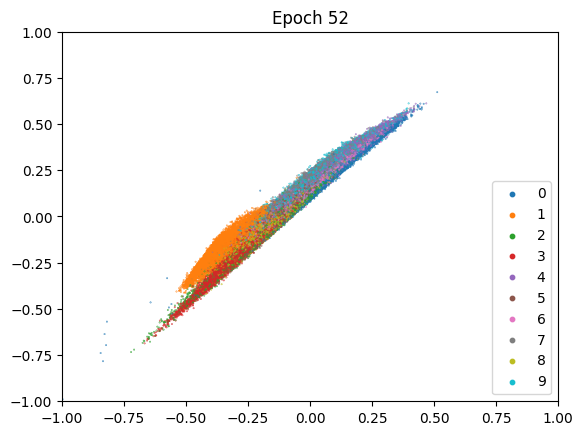

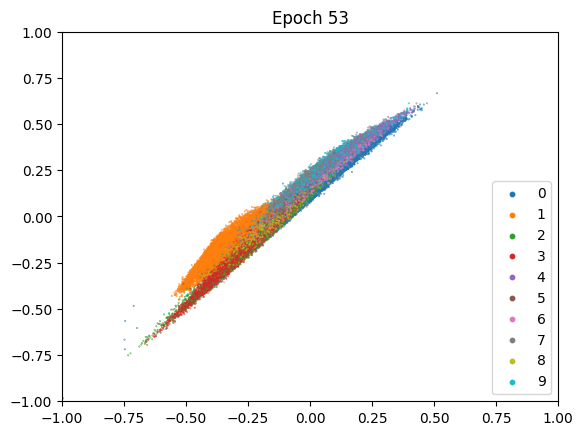

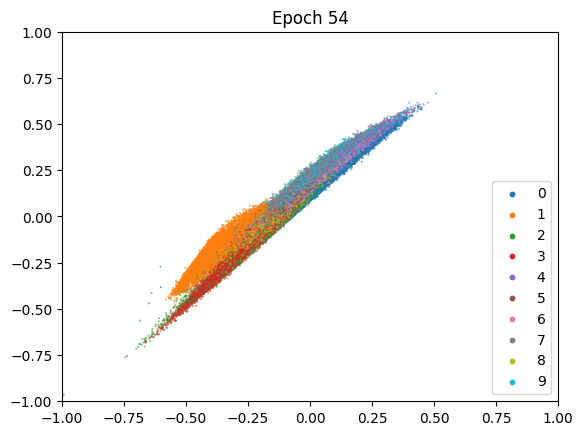

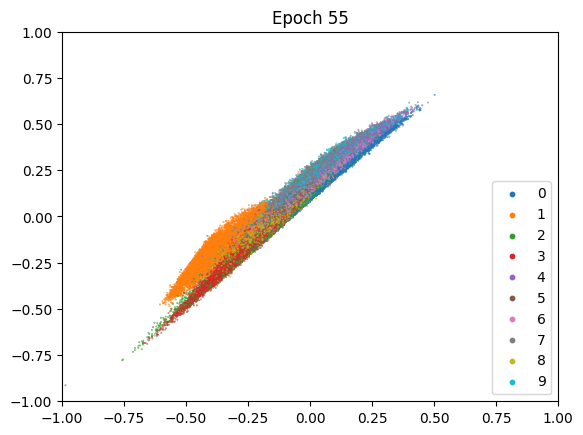

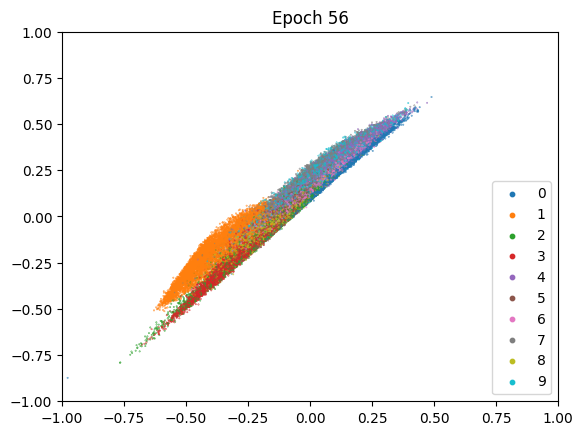

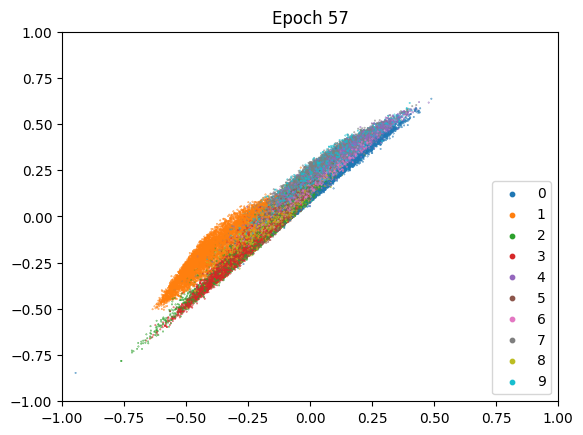

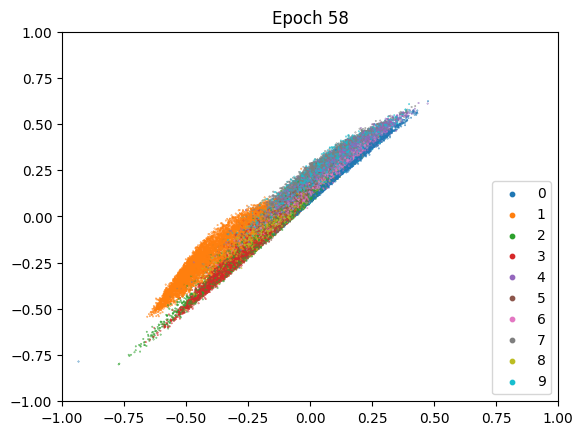

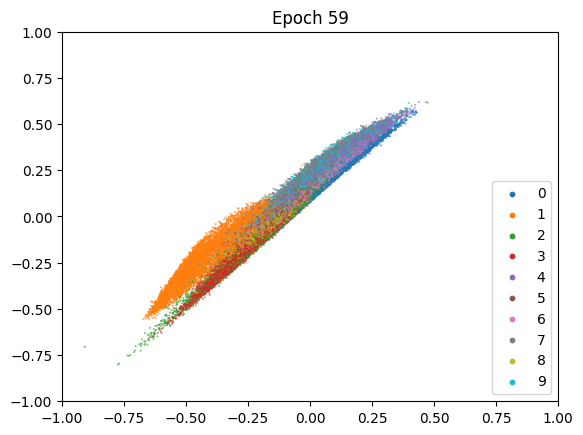

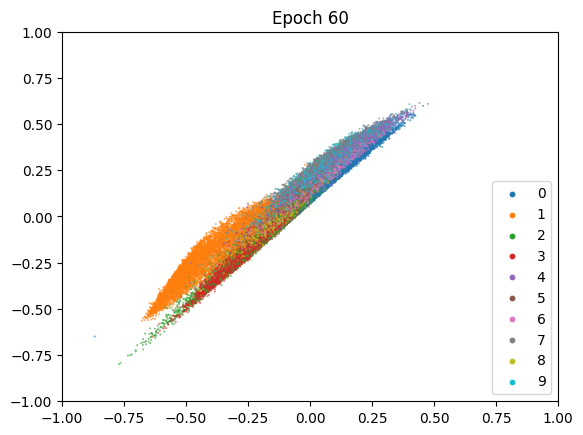

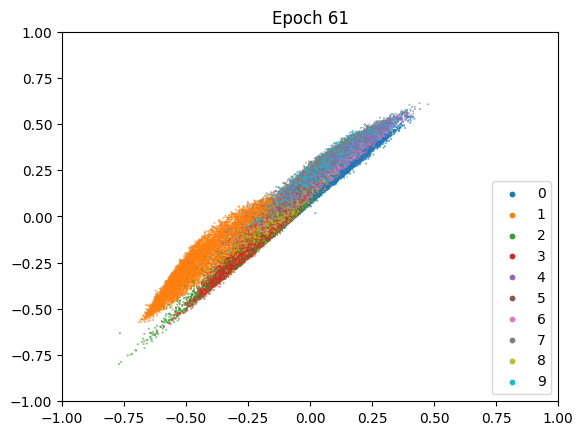

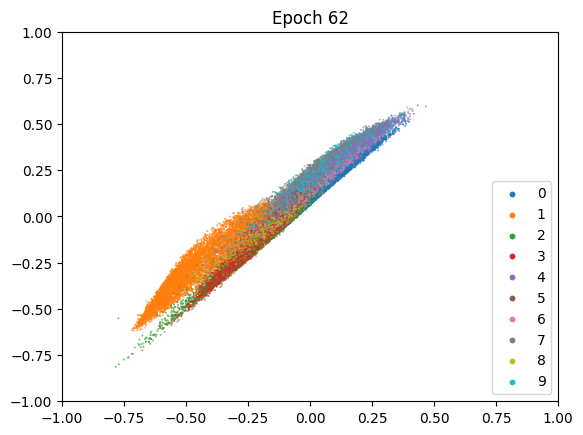

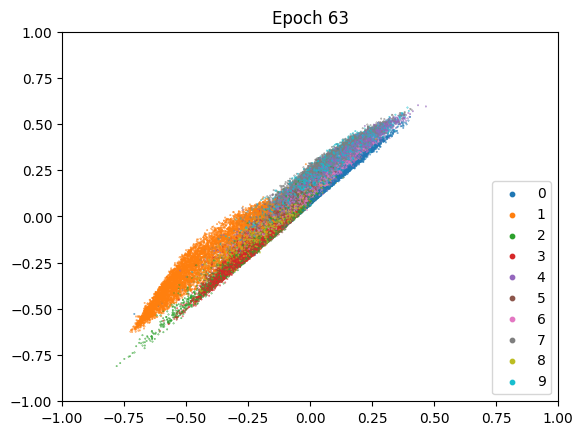

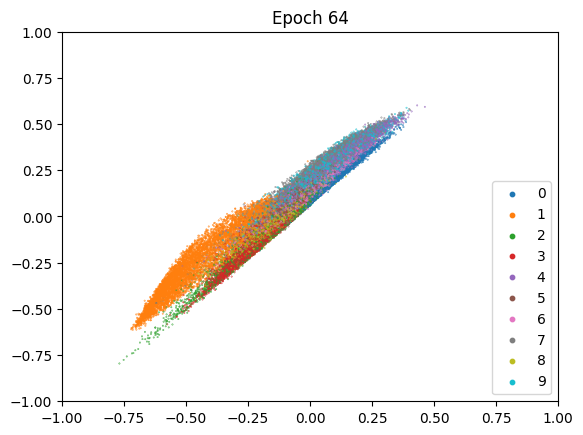

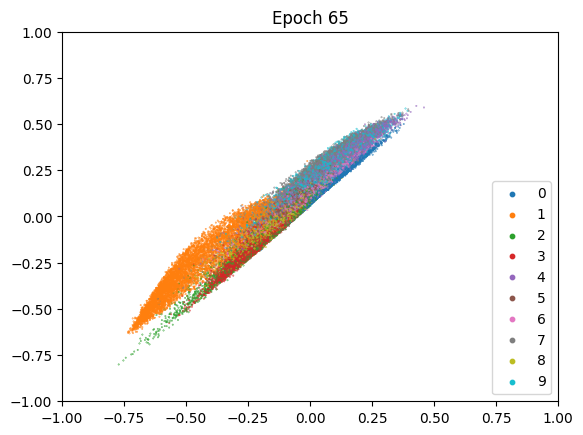

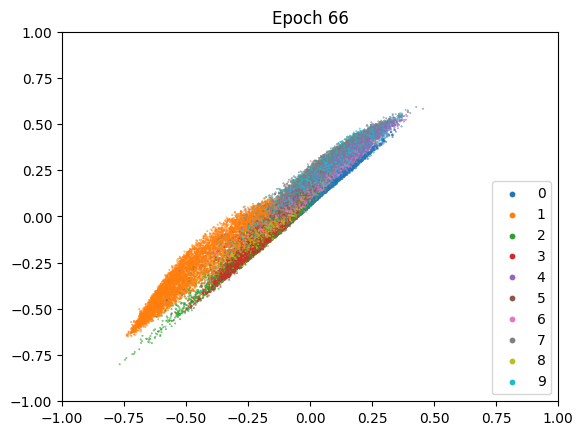

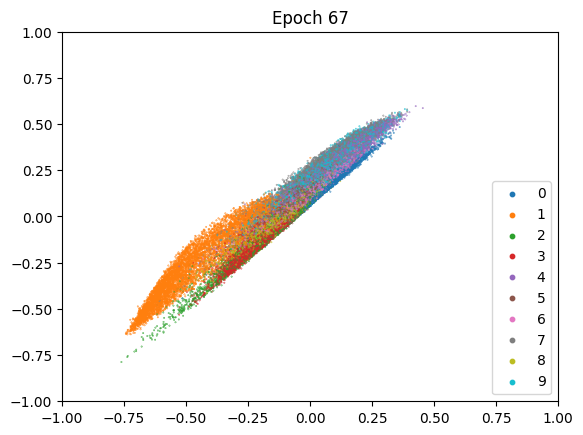

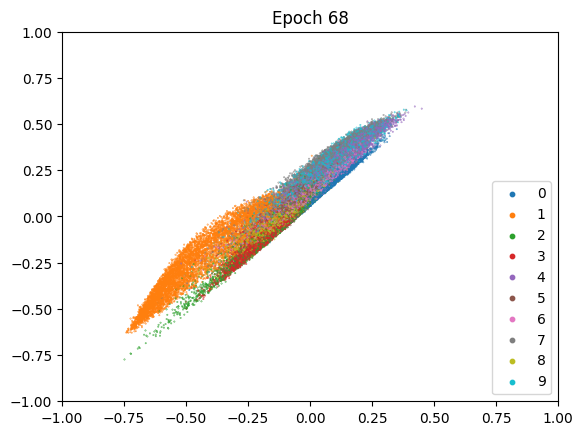

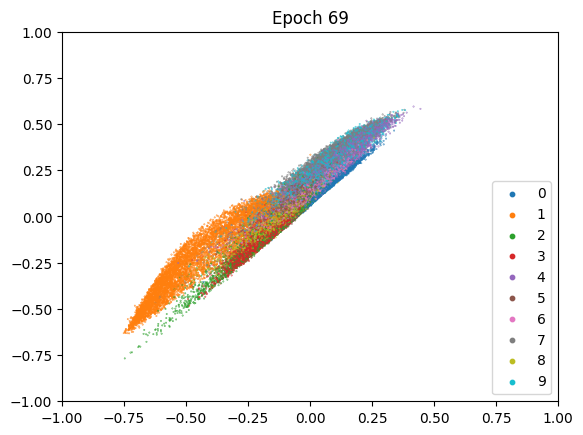

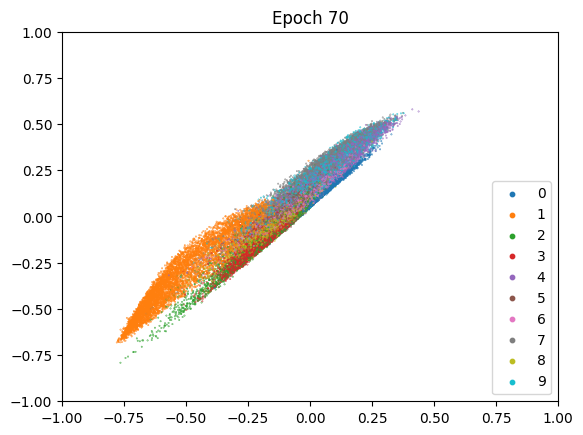

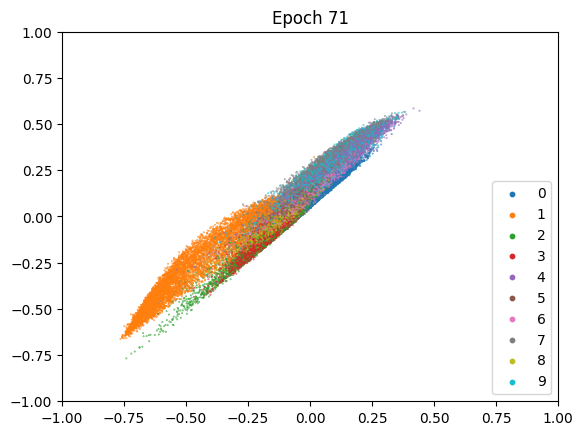

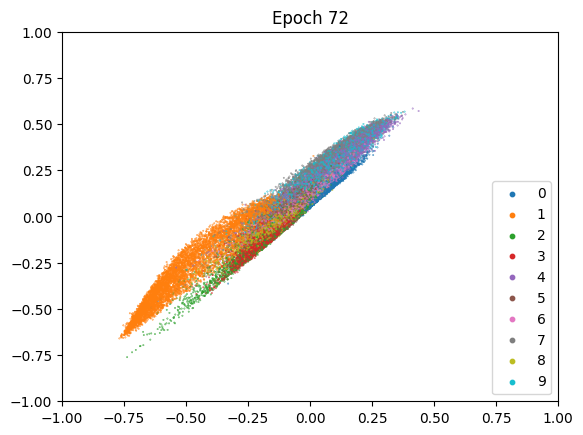

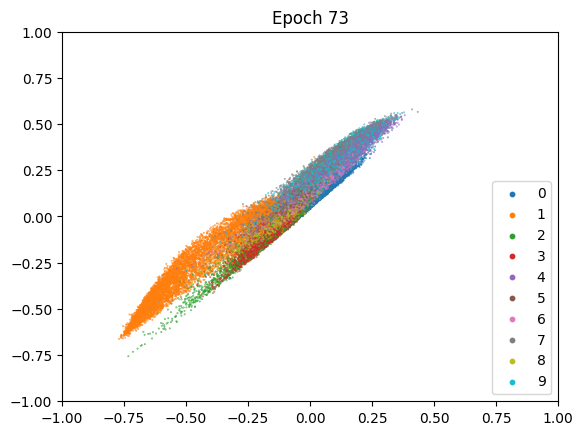

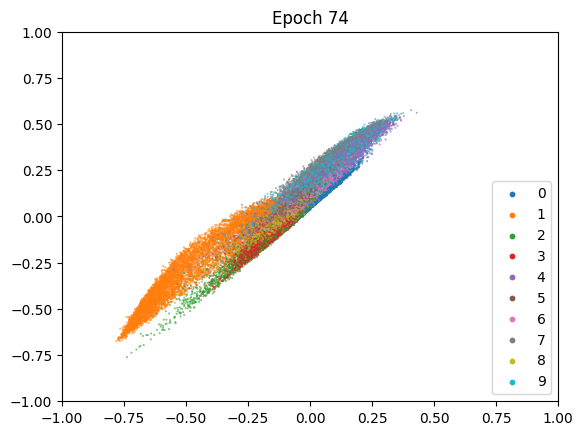

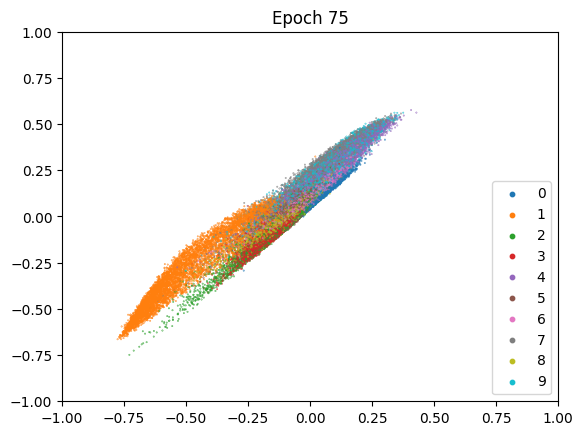

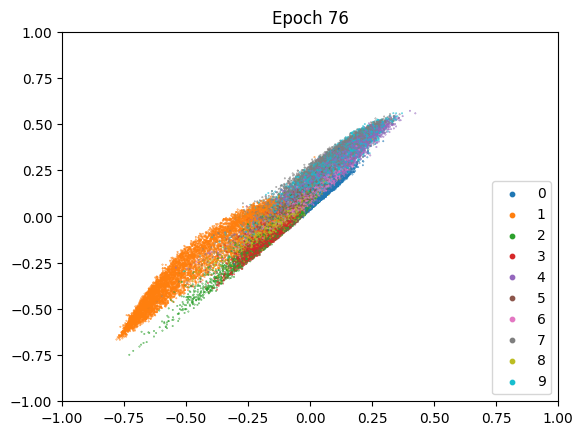

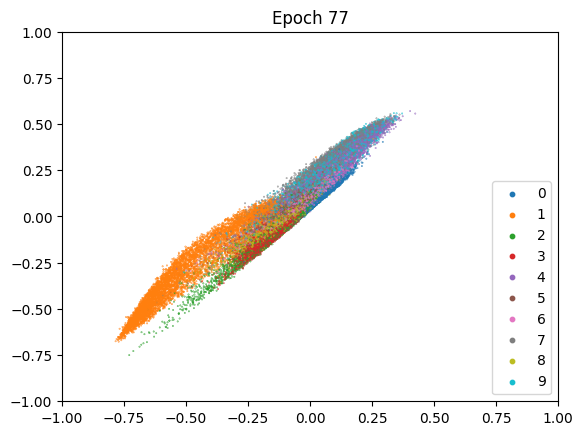

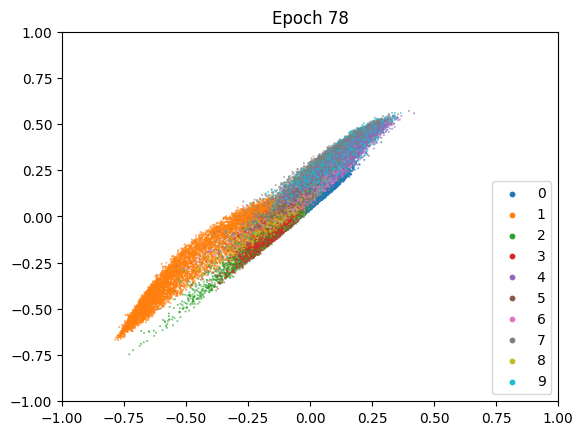

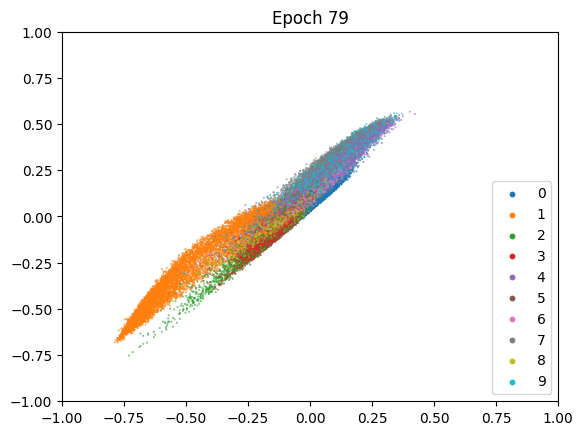

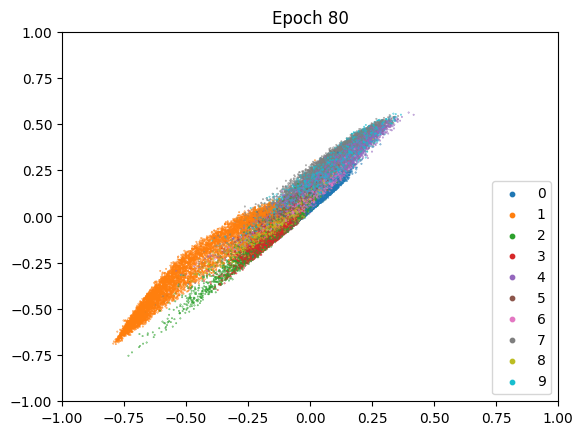

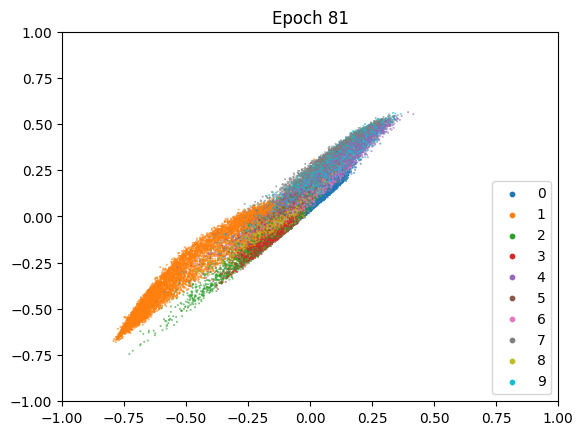

KeyboardInterrupt: 

In [43]:
for epoch in range(len(encoder_output_concatenated)):
  pred_train = encoder_output_concatenated[epoch]
  plt.scatter(pred_train[:, 0], pred_train[:, 1], c=train_labels, cmap=plt.cm.tab10, s=0.1)
  plt.ylim(-1, 1)
  plt.xlim(-1, 1)
  plt.title('Epoch ' + str(epoch))

  # plt legend manually for every 10 classes
  for i in range(10):
      plt.scatter([], [], c=colors[i], label=i, s=10)

  # plt legend with location down right
  plt.legend(loc='lower right')

  plt.show()

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
!ls ./drive/MyDrive/temp

autoencoder_weights_part3.weights.h5  decoder_output_buff_part3.npy  encoder_output_buff_part3.npy
decoder_output_buff_part1.npy	      encoder_output_buff_part1.npy
decoder_output_buff_part2.npy	      encoder_output_buff_part2.npy


In [35]:
from glob import glob

decoder_output_buff_paths = sorted(glob('./drive/MyDrive/temp/decoder_*'))
encoder_output_buff_paths = sorted(glob('./drive/MyDrive/temp/encoder_*'))

['./drive/MyDrive/temp/encoder_output_buff_part1.npy',
 './drive/MyDrive/temp/encoder_output_buff_part2.npy',
 './drive/MyDrive/temp/encoder_output_buff_part3.npy']

In [42]:

# encoder_output1 = np.load(encoder_output_buff_paths[0])
# encoder_output2 = np.load(encoder_output_buff_paths[1])
# encoder_output3 = np.load(encoder_output_buff_paths[2])[:31] # corrupted at 31
# encoder_output4 = np.load('./drive/MyDrive/encoder_output_buff_part4.npy')
# encoder_output5 = np.load('./drive/MyDrive/encoder_output_buff_part5.npy')

# decoder_output1 = np.load(decoder_output_buff_paths[0])
# decoder_output2 = np.load(decoder_output_buff_paths[1])
# decoder_output3 = np.load(decoder_output_buff_paths[2])[:31] # corrupted at 31
# decoder_output4 = np.load('./drive/MyDrive/decoder_output_buff_part4.npy')
# decoder_output5 = np.load('./drive/MyDrive/decoder_output_buff_part5.npy')


# Concatenate all
encoder_output_concatenated = np.concatenate([encoder_output1, encoder_output2, encoder_output3, encoder_output4, encoder_output5])
decoder_output_concatenated = np.concatenate([decoder_output1, decoder_output2, decoder_output3, decoder_output4, decoder_output5])

dbg(encoder_output_concatenated)
dbg(decoder_output_concatenated)

Shape:  (431, 60000, 2)
Dtype:  float64

Shape:  (431, 10, 28, 28)
Dtype:  float64



In [36]:
# # save all buffer to numpy save archived

# np.save('./drive/MyDrive/encoder_output_buff_part5.npy', encoder_output_buff)
# np.save('./drive/MyDrive/decoder_output_buff_part5.npy', decoder_output_buff)

In [ ]:
# denormalize that range(-1,1) to range(0,1)
# decoder_output_buff_denormalized = (decoder_output_buff + 1) / 2

In [ ]:
# for epoch in range(10):
#   pred_train = decoder_output_buff[epoch]
#   # 2 rows 5 cols for decoder output displaying 0 to 5 and 6 to 9
#   fig, axs = plt.subplots(2, 5, figsize=(10, 5))
#   for i in range(10):
#     axs[i // 5, i % 5].imshow(unique_train_images_output[i].reshape(28,28), cmap=plt.cm.binary)
#     axs[i // 5, i % 5].axis('off')
#   plt.title(f'Epoch {epoch}')
#   plt.show()
#   print()
#   break

# for epoch in range(50):
#   pred_train = decoder_output_buff[epoch]
#   # 2 rows 5 cols for decoder output displaying 0 to 5 and 6 to 9
#   fig, axs = plt.subplots(2, 5, figsize=(10, 5))
#   for i in range(10):
#     axs[i // 5, i % 5].imshow(pred_train[i], cmap=plt.cm.binary)
#     axs[i // 5, i % 5].axis('off')
#   axs[0, 2].set_title(f'Epoch {epoch}')
#   plt.show()
#   print()

In [59]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Initialize a list to store frames
frames = []

# Iterate over epochs and generate frames
for epoch in range(len(encoder_output_concatenated)):
    # Create a figure
    fig = plt.figure(figsize=(10, 8))

    # =========== ENCODER OUTPUT ==========
    pred_train_encoder = encoder_output_concatenated[epoch]

    # Create a subplot for the encoder output that spans the top row (1x5)
    ax_encoder = plt.subplot2grid((3, 5), (0, 0), colspan=5)
    scatter = ax_encoder.scatter(pred_train_encoder[:, 0], pred_train_encoder[:, 1], c=train_labels, cmap=plt.cm.tab10, s=0.1)
    ax_encoder.set_ylim(-1, 1)
    ax_encoder.set_xlim(-1, 1)
    ax_encoder.set_title(f'Encoder Output | Epoch: {epoch}')

    # Add legend for the classes
    # plt legend manually for every 10 classes
    for i in range(10):
        ax_encoder.scatter([], [], c=colors[i], label=i, s=10)
    ax_encoder.legend(loc='lower right')

    # =========== DECODER OUTPUT ==========
    pred_train_decoder = decoder_output_concatenated[epoch]

    # Create subplots for the decoder output in the remaining grid
    for i in range(10):
        ax_decoder = plt.subplot2grid((3, 5), ((i // 5) + 1, i % 5))
        ax_decoder.imshow(pred_train_decoder[i], cmap=plt.cm.binary)
        ax_decoder.axis('off')

    # Set the title for the entire decoder section
    fig.suptitle(f'Decoder Output | Epoch: {epoch}', x=0.5, y=0.375, ha='center')

    # Adjust spacing between subplots
    # plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save the frame to the list
    fig.canvas.draw()  # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)

    # Close the figure to prevent memory leaks
    plt.close(fig)

# Save the frames as an animated GIF
imageio.mimsave('output_best.gif', frames, fps=30)  # Adjust the fps as needed


<ipython-input-59-cc17d396f190>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_encoder.scatter([], [], c=colors[i], label=i, s=10)


In [60]:
# save frames to pickle
import pickle

with open('./drive/MyDrive/frames.pkl', 'wb') as f:
    pickle.dump(frames, f)